<ipython-input-2-68f54905305f>:23: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timestamps = pd.date_range("2024-06-01", periods=num_points, freq="S")  # 1 soniya farq bilan


Ma'lumotlar:
          X         Y          Z  g_observed   delta_g    g_total  \
0  0.000000  0.000000  18.727006   10.469585 -0.093714  10.375870   
1  2.040816  2.040816  47.535715   10.275133  0.027282  10.302415   
2  4.081633  4.081633  36.599697   10.439499 -0.037129  10.402370   
3  6.122449  6.122449  29.932924   10.394827  0.001714  10.396541   
4  8.163265  8.163265   7.800932   10.097900  0.081513  10.179413   

            timestamp  
0 2024-06-01 00:00:00  
1 2024-06-01 00:00:01  
2 2024-06-01 00:00:02  
3 2024-06-01 00:00:03  
4 2024-06-01 00:00:04  


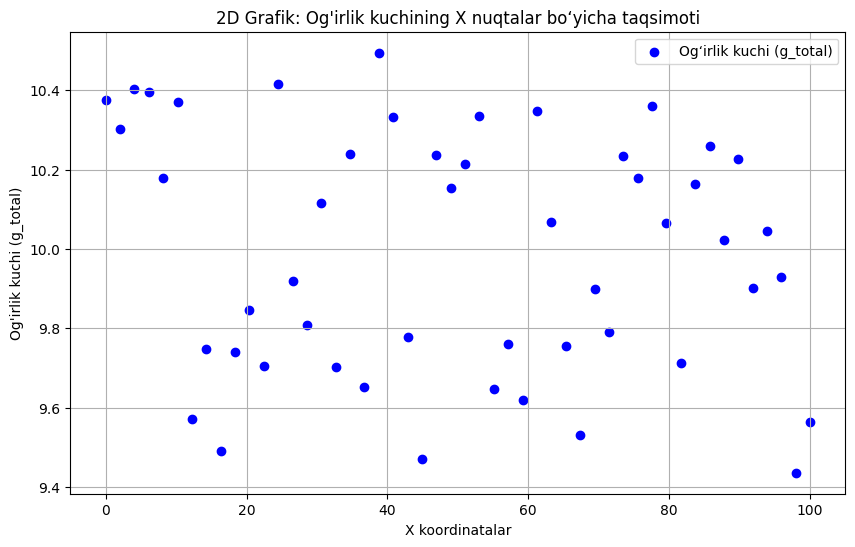

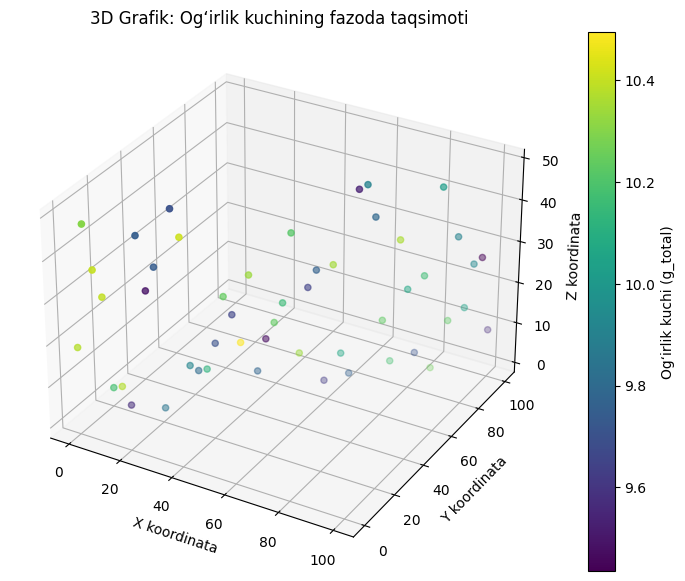


Og‘irlik kuchi statistikasi:
count    50.000000
mean      9.990098
std       0.305995
min       9.435715
25%       9.742318
50%      10.033049
75%      10.239001
max      10.494755
Name: g_total, dtype: float64


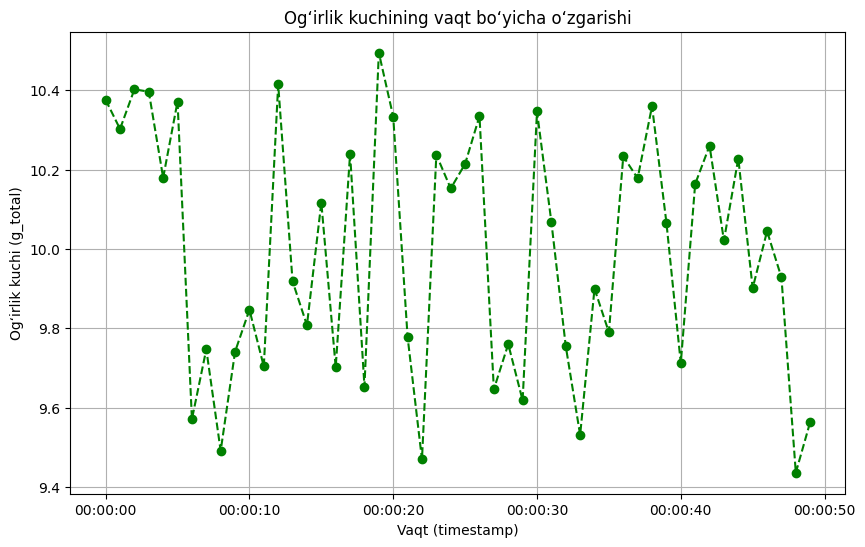

In [2]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 1. Ma'lumotlar tayyorlash
num_points = 50  # O'lchov nuqtalari soni
np.random.seed(42)

# Sun'iy o'lchov ma'lumotlarini yaratish
x = np.linspace(0, 100, num_points)  # X koordinatalari
y = np.linspace(0, 100, num_points)  # Y koordinatalari
z = np.random.uniform(0, 50, num_points)  # Z koordinatalari
g_observed = np.random.uniform(9.5, 10.5, num_points)  # O'lchangan og'irlik kuchi
delta_g = np.random.uniform(-0.1, 0.1, num_points)  # Δg o'zgaruvchanligi

# To'liq og'irlik kuchini hisoblash
g_total = g_observed + delta_g

# Vaqt (timestamp)
timestamps = pd.date_range("2024-06-01", periods=num_points, freq="S")  # 1 soniya farq bilan

# Ma'lumotlarni DataFrame ko'rinishida jamlash
data = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'g_observed': g_observed,
    'delta_g': delta_g,
    'g_total': g_total,
    'timestamp': timestamps
})

# Ma'lumotlarning birinchi 5 qat'ori
print("Ma'lumotlar:")
print(data.head())

# 2. 2D Grafik yaratish
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['g_total'], c='blue', label='Og‘irlik kuchi (g_total)')
plt.title("2D Grafik: Og'irlik kuchining X nuqtalar bo‘yicha taqsimoti")
plt.xlabel("X koordinatalar")
plt.ylabel("Og'irlik kuchi (g_total)")
plt.legend()
plt.grid()
plt.show()

# 3. 3D Grafik yaratish
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nuqtalarni chizish
scatter = ax.scatter(data['X'], data['Y'], data['Z'], c=data['g_total'], cmap='viridis', marker='o')

# O'qlarni nomlash
ax.set_title("3D Grafik: Og‘irlik kuchining fazoda taqsimoti")
ax.set_xlabel("X koordinata")
ax.set_ylabel("Y koordinata")
ax.set_zlabel("Z koordinata")

# Rang paneli
fig.colorbar(scatter, ax=ax, label='Og‘irlik kuchi (g_total)')
plt.show()

# # 4. Animatsiya yaratish
# fig, ax = plt.subplots(figsize=(10, 6))
# sc = ax.scatter([], [], c=[], cmap='plasma', s=50)

# ax.set_xlim(0, 100)
# ax.set_ylim(9.3, 10.7)
# ax.set_title("Animatsiya: Og‘irlik kuchining vaqt bo‘yicha o‘zgarishi")
# ax.set_xlabel("X koordinatalar")
# ax.set_ylabel("Og‘irlik kuchi (g_total)")

# # Animatsiya funksiyasi
# def update(frame):
#     current_data = data.iloc[:frame]
#     sc.set_offsets(np.c_[current_data['X'], current_data['g_total']])
#     sc.set_array(current_data['g_total'])
#     return sc,

# # Animatsiyani yaratish
# ani = FuncAnimation(fig, update, frames=len(data), interval=200, repeat=False)
# plt.show()

# 5. Hisobot uchun ma'lumot tahlili
print("\nOg‘irlik kuchi statistikasi:")s
print(data['g_total'].describe())

# Vaqt bo‘yicha og‘irlik kuchi o‘zgarishi
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['g_total'], color='green', marker='o', linestyle='--')
plt.title("Og‘irlik kuchining vaqt bo‘yicha o‘zgarishi")
plt.xlabel("Vaqt (timestamp)")
plt.ylabel("Og‘irlik kuchi (g_total)")
plt.grid()
plt.show()
